In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv( './input/stats.csv',index_col=0,comment ='#')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 186 to 2147
Data columns (total 47 columns):
Away_FreeKicksConceded          1772 non-null int64
Away_HandlingErrors             1772 non-null int64
Away_KickMetres                 1772 non-null int64
Away_Kicks                      1772 non-null int64
Away_LineBreaks                 1772 non-null int64
Away_LineOutsNotStraight        1772 non-null int64
Away_LineOutsWon                1772 non-null int64
Away_LineOutsWonAgainstThrow    1772 non-null int64
Away_MissedTackes               1772 non-null int64
Away_Name                       1772 non-null object
Away_OffLoads                   1772 non-null int64
Away_PenaltiesConceded          1772 non-null int64
Away_PhaseSevenPlus             1772 non-null int64
Away_Possesion                  1772 non-null int64
Away_RunMetres                  1772 non-null int64
Away_Runs                       1772 non-null int64
Away_Score                      1772 non-null int64
Away_S

In [43]:
temp = data.copy()

temp['isWin']  = temp['Home_Score'] > temp['Away_Score']
temp['isOverPossesion'] = temp['Home_Possesion'] > temp['Away_Possesion']

print(round(len(temp.query('isWin == isOverPossesion')) / len(temp),2) * 100,'%')

50.0 %


Text(0.5,1,'勝ったチームのボールポゼッション')

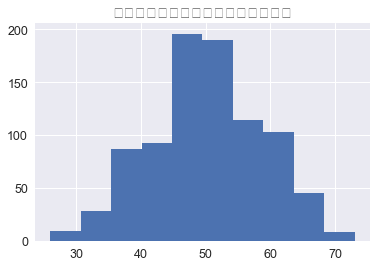

In [44]:
temp2 = pd.to_numeric(temp.query('isWin == True')['Home_Possesion'], errors='coerce').dropna()

plt.hist(temp2)
plt.title('勝ったチームのボールポゼッション')

In [45]:
temp = data.copy()
temp['isWin']  = temp['Home_Score'] > temp['Away_Score']
temp['isOverTerritory'] = temp['Home_Territory'] > temp['Away_Territory']

print(round(len(temp.query('isWin == isOverTerritory')) / len(temp),2) * 100,'%')

55.00000000000001 %


Text(0.5,1,'勝ったチームの地域支配率')

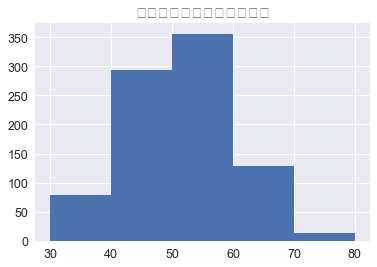

In [46]:
temp2 = pd.to_numeric(temp.query('isWin == True')['Home_Territory'], errors='coerce').dropna()

plt.hist(temp2,bins=np.arange(30,81,10))
plt.grid(True)
plt.title('勝ったチームの地域支配率')

In [47]:
# 南アフリカのチームのボール支配率
temp = data.copy()
temp2 = temp.query("Home_Name in ('Bulls','Lions','Sharks','Stormers')")
temp3 = pd.to_numeric(temp2['Home_Possesion'], errors='coerce').dropna()
np.mean(temp3)

50.58767772511848

In [48]:
# 特徴量分析
temp = data.copy()
temp['Diff_Score'] = temp['Home_Score'] - temp['Away_Score'] 
temp = temp.query('Diff_Score != 0')
temp['isWin'] = list(map(lambda x : 1 if x > 0 else 0 , temp['Diff_Score']))
temp=temp.drop(['Away_Name','Home_Name','Url','Home_Score','Away_Score','Diff_Score'],axis=1)

temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746 entries, 186 to 2147
Data columns (total 43 columns):
Away_FreeKicksConceded          1746 non-null int64
Away_HandlingErrors             1746 non-null int64
Away_KickMetres                 1746 non-null int64
Away_Kicks                      1746 non-null int64
Away_LineBreaks                 1746 non-null int64
Away_LineOutsNotStraight        1746 non-null int64
Away_LineOutsWon                1746 non-null int64
Away_LineOutsWonAgainstThrow    1746 non-null int64
Away_MissedTackes               1746 non-null int64
Away_OffLoads                   1746 non-null int64
Away_PenaltiesConceded          1746 non-null int64
Away_PhaseSevenPlus             1746 non-null int64
Away_Possesion                  1746 non-null int64
Away_RunMetres                  1746 non-null int64
Away_Runs                       1746 non-null int64
Away_ScrumsWon                  1746 non-null int64
Away_SendOffs                   1746 non-null int64
Away_Si

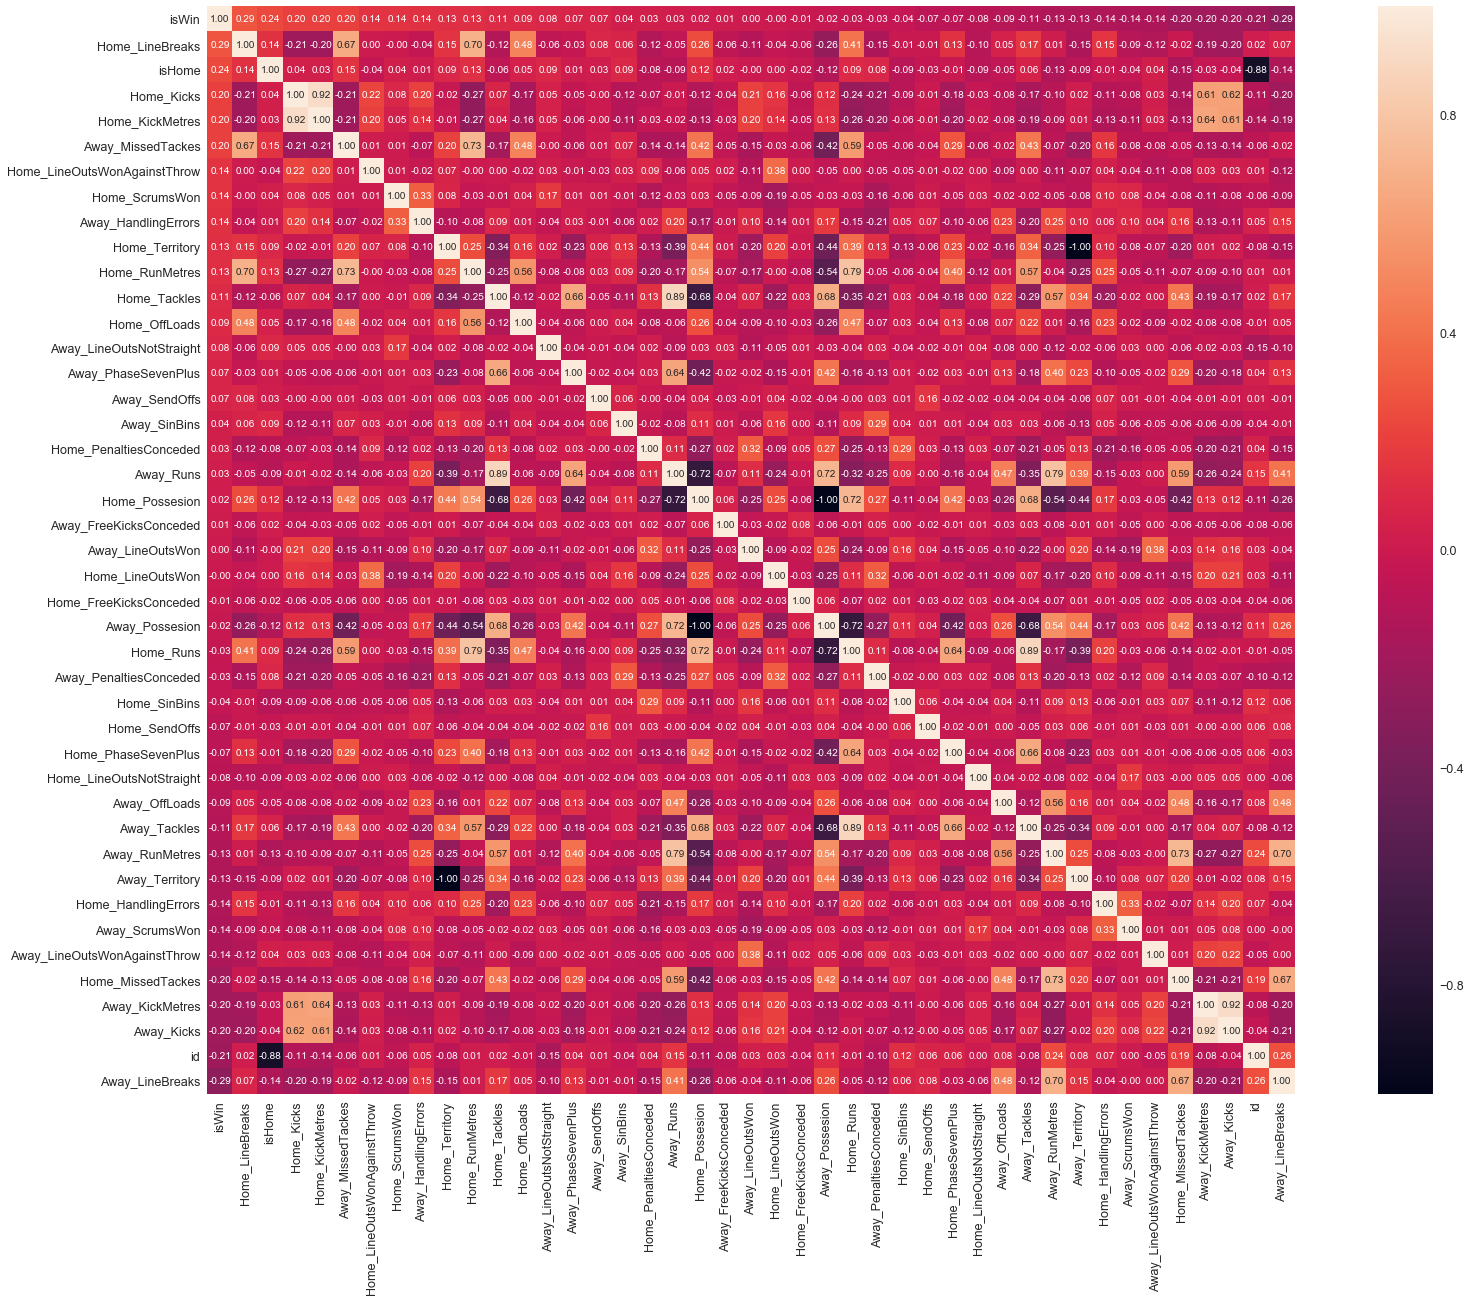

In [49]:
import seaborn as sns
k  = 45
plt.subplots(figsize=(30, 20))


corrmat = temp.corr()
cols = corrmat.nlargest(k, 'isWin')['isWin'].index
cm = np.corrcoef(temp[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square=True, fmt='.2f', annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()